In [ ]:
import pandas as pd
import numpy as np
#header='infer', index_col=None
path="/content/drive/MyDrive/newdata_timeseries_21_1_2023.csv"
df1= pd.read_csv(path,header=0,names=['tlon','tlat','Nlon','Nlat','tags'],index_col=0)
#Input: (1) A set of line segments D = {L1, · · · , Lnumln },####ALL CHARACTERISTIC LINE SEGMENTS\
df1['boolean_column'] = np.where((df1['tlon'] ==df1['Nlon']) & (df1['tlat'] ==df1['Nlat']   ) , True, False)
df1.drop(df1[df1['boolean_column'] == True].index, inplace=True)
df1=df1.drop(['boolean_column'], axis=1)
df1 = df1.reset_index(drop=True)
df1 = df1.reset_index()
#df1= df[df['boolean_column']== True]
#df1
df1 = df1.rename(columns={'index': 'line'})
#df1.drop(df1.tail(2).index,inplace=True)
df1['clusterId']=np.nan
df1['noise']=np.nan
print(df1)

import pandas as pd
import numpy as np
path='/content/drive/MyDrive/neigborsmap_all_dist24_01_2023.csv'
#names=['tlon','tlat','Nlon','Nlat','tags']
distances= pd.read_csv(path,header=None,names=['line','tags','neigborindex','distance'])
distances['clusterId']=np.nan
distances['noise']=np.nan
distances


df_neigbors=distances[distances['distance'] < 66037]
df_neigbors


df_ne=df_neigbors.groupby(['line'])['line'].count()
df_ne=df_ne.to_frame()
df_ne=df_ne.rename(columns={ df_ne.columns[0]: "counts" })
df_ne=df_ne.reset_index(drop=False)
df_ne1=df_neigbors.groupby(['neigborindex'])['neigborindex'].count()
df_ne1=df_ne1.to_frame()
df_ne1=df_ne1.rename(columns={ df_ne.columns[0]: "neigborcounts" })
#df_ne1=df_ne1.reset_index(drop=False)
# merge the two DataFrames on column 'A' and 'B'
merged_df = pd.merge(df_ne, df_ne1,left_on=['line'], right_on=df_ne1.index, how='outer')


# merge the two DataFrames on column 'A' and 'B'
merged_df1 = pd.merge(df1, merged_df, left_on=['line'], right_on=['line'], how='outer')
# remove duplicate rows
merged_df1 = merged_df1.drop_duplicates()
df=merged_df1

df=df.fillna(0)
df['clusterId']=np.nan
df['noise']=np.nan
df['total']=df['counts']+ df['neigborindex']
print('mean neigbors:', df.total.describe())
distances

        line           tlon          tlat           Nlon          Nlat   tags  \
0          0  349769.161257  4.148271e+06  339865.959082  4.152734e+06    0.0   
1          1  339865.959082  4.152734e+06  337501.043594  4.154564e+06    0.0   
2          2  337501.043594  4.154564e+06  337120.849949  4.156004e+06    0.0   
3          3  337120.849949  4.156004e+06  336177.869837  4.155345e+06    0.0   
4          4  336177.869837  4.155345e+06  329353.708674  4.150763e+06    0.0   
...      ...            ...           ...            ...           ...    ...   
12203  12203  311876.724101  4.165208e+06  319808.727702  4.150336e+06  838.0   
12204  12204  319808.727702  4.150336e+06  319794.487192  4.147384e+06  838.0   
12205  12205  319794.487192  4.147384e+06  318963.014609  4.145493e+06  838.0   
12206  12206  318963.014609  4.145493e+06  318389.705915  4.145186e+06  838.0   
12207  12207  318389.705915  4.145186e+06  318069.840146  4.145537e+06  838.0   

       clusterId  noise  
0

,line,tags,neigborindex,distance,clusterId,noise
0,0,0.0,1,4299.900135,NaN,NaN
1,0,0.0,2,6541.137348,NaN,NaN
2,0,0.0,3,6962.484470,NaN,NaN
3,0,0.0,4,21221.701839,NaN,NaN
4,0,0.0,5,30317.518730,NaN,NaN
...,...,...,...,...,...,...
74511523,12204,838.0,12206,3959.320393,NaN,NaN
74511524,12204,838.0,12207,3902.397533,NaN,NaN
74511525,12205,838.0,12206,1314.372626,NaN,NaN
74511526,12205,838.0,12207,1488.806602,NaN,NaN


In [ ]:
from google.colab import files
df.to_csv('dfdist66037minlns4573.csv')  

In [ ]:
df.clusterId.describe()

In [ ]:
df.groupby('clusterId').size()

clusterId
0.0      37
1.0    2476
2.0     151
3.0    2728
4.0    5025
dtype: int64

In [ ]:
df.groupby('clusterId')['tags'].nunique()

clusterId
0.0     29
1.0    392
2.0     46
3.0    230
4.0    434
Name: tags, dtype: int64

In [ ]:
from google.colab import files
df_neigbors.to_csv('garbdistancesmapdist66037minlns4573.csv')  

In [ ]:
import pandas as pd
path='/content/garbdistancesmapdist66037minlns4573.csv'
#names=['tlon','tlat','Nlon','Nlat','tags']
df_neigbors= pd.read_csv(path,header=0,index_col=0)
df_neigbors=df_neigbors.reset_index(drop=True)
df_neigbors_full = pd.merge(distances, df_neigbors, left_on=['line', 'neigborindex'], right_on=['line', 'neigborindex'], how='outer')
df_neigbors_full = df_neigbors_full.drop_duplicates(subset=['line', 'neigborindex'], keep='first')
df_neigbors_full = df_neigbors_full.drop(df_neigbors_full.filter(regex='_x').columns, axis=1)
df_neigbors_full = df_neigbors_full.rename(columns=lambda x: x.rstrip('_y'))
df_neigbors=df_neigbors_full
print(df_neigbors)
from google.colab import files
df_neigbors_full.to_csv('distances_map_dist_66037_minlns_3660.csv')  



In [ ]:
import pandas as pd
path='/content/distances_map_dist_66037_minlns_4573.csv'
#names=['tlon','tlat','Nlon','Nlat','tags']
df_neigbors_full= pd.read_csv(path,header=0,index_col=0)
df_neigbors_full=df_neigbors_full.reset_index(drop=True)
df_neigbors_full

In [ ]:
import numpy as np

# Checking unique values in the clusterId column of distances DataFrame
#print(df_neigbors_full.clusterId.unique())
# Iterating over rows in df_neigbors DataFrame
for i in range(len(df_neigbors_full)):
    # Storing the lineid and neigborindex of current row
    lineid=df_neigbors_full.line[i]
    neigborindex=df_neigbors_full.neigborindex[i]
    if pd.isna(df1.clusterId[neigborindex]) and pd.notna(df_neigbors_full.clusterId[i]):
      # Updating the clusterId value in df DataFrame
      df1.loc[neigborindex, 'clusterId'] = df_neigbors_full.clusterId[i]
    # Checking if the clusterId value in df DataFrame is NaN and the clusterId value in df_neigbors DataFrame is not NaN
    if pd.isna(df1.clusterId[lineid]) and pd.notna(df_neigbors_full.clusterId[i]):
        # Updating the clusterId value in df DataFrame
        df1.loc[lineid, 'clusterId'] = df_neigbors_full.clusterId[i]
    else:
        pass
#df1[['clusterId']] = df1[['clusterId']].astype(int)
print(df1)

df = df1[df1['clusterId'].notna()]
df[['clusterId']] = df[['clusterId']].astype(int)
print(df)

from google.colab import files
df1.to_csv('all_lines_clustered_dist66037_minlns4573.csv')  

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-5-ef3465cd0dc5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['clusterId'].map(cluster_colors)


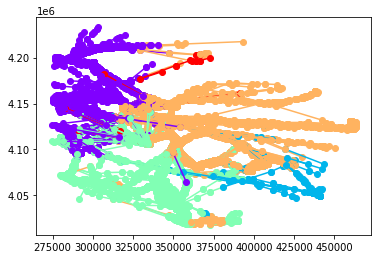

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df=df.dropna(subset=['clusterId'])
df[['clusterId']] = df[['clusterId']].astype(int)

unique_clusters = df['clusterId'].unique()
colors = cm.get_cmap('rainbow')((unique_clusters-min(unique_clusters))/(max(unique_clusters)-min(unique_clusters)))
# Get the unique values of the 'cluster_id' column
#df['clusterId'].fillna(-1, inplace=True)
df.dropna()
cluster_colors = {cluster: color for cluster, color in zip(unique_clusters, colors)}
df['color'] = df['clusterId'].map(cluster_colors)
# Map the unique values to a colormap
# Iterate over the DataFrame and plot each line segment with the corresponding color
for index, row in df.iterrows():
    plt.plot([row['tlon'],row['Nlon']],[row['tlat'],row['Nlat']], marker='o', color=colors[row['clusterId']-1])

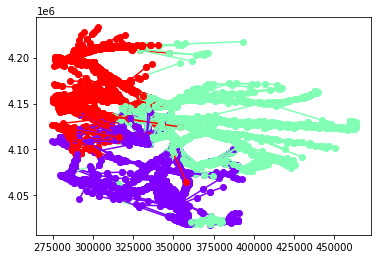

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
df=df.dropna(subset=['clusterId'])
df['clusterId'].replace(0 ,np.nan ,inplace=True)
df['clusterId'].replace(1, 0 ,inplace=True)
df['clusterId'].replace(2 ,np.nan ,inplace=True)
df['clusterId'].replace(3 ,1 ,inplace=True)
df['clusterId'].replace(4 ,2 ,inplace=True)
#df['clusterId'].replace(5,3,inplace=True)


df=df.dropna(subset=['clusterId'])
df[['clusterId']] = df[['clusterId']].astype(int)

unique_clusters = df['clusterId'].unique()
colors = cm.get_cmap('rainbow')((unique_clusters-min(unique_clusters))/(max(unique_clusters)-min(unique_clusters)))
# Get the unique values of the 'cluster_id' column
#df['clusterId'].fillna(-1, inplace=True)
df.dropna()
cluster_colors = {cluster: color for cluster, color in zip(unique_clusters, colors)}
df['color'] = df['clusterId'].map(cluster_colors)
# Map the unique values to a colormap
# Iterate over the DataFrame and plot each line segment with the corresponding color
for index, row in df.iterrows():
    plt.plot([row['tlon'],row['Nlon']],[row['tlat'],row['Nlat']], marker='o', color=colors[row['clusterId']-1])